<a href="https://colab.research.google.com/github/Srinivasan-9/CodeAlpa_Task2/blob/main/sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import math   as m
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.metrics import mean_squared_error ,mean_absolute_error ,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

# Functions

In [ ]:
def Vsualize(column_name,data):

    values = data[column_name].value_counts().values.round(2)
    index = data[column_name].value_counts().index

    color = sns.color_palette('RdBu')
    plt.figure(figsize=(7,5))
    # pie chart of column
    plt.subplot(1, 2, 1)
    plt.title(f'Distribution of {column_name}')
    plt.pie(values, labels=index,autopct='%1.1f%%',colors=color)

    # Distribution of column
    plt.subplot(1, 2, 2)
    sns.histplot(data[column_name])
    plt.ylabel(f'Number of {column_name}')
    plt.tight_layout()
    plt.show()

In [ ]:
def train_test_model(model,x_train,x_test,y_train,y_test):
    # Train model
    model.fit(x_train,y_train)

    # Test model
    y_predict = model.predict(x_test)

    #Evaluate Model
    print(f"R2 Score =  {r2_score(y_test,y_predict) * 100:.2f}%")
    print('Mean Absolute Error = ',mean_absolute_error(y_test, y_predict))
    print('Mean Squared Error = ',mean_squared_error(y_test, y_predict))
    print('Root Mean Squared Error = ',m.sqrt(mean_squared_error(y_test, y_predict)))

    # Scatter plot for real and predict data
    plt.scatter(y_test,y_predict)
    return model

In [ ]:
path = '/kaggle/input/advertisingcsv/Advertising.csv'
data = pd.read_csv(path)

In [ ]:
data.shape

(200, 5)

In [ ]:
data.sample(10)

,Unnamed: 0,TV,Radio,Newspaper,Sales
37,38,74.7,49.4,45.7,14.7
159,160,131.7,18.4,34.6,12.9
31,32,112.9,17.4,38.6,11.9
24,25,62.3,12.6,18.3,9.7
25,26,262.9,3.5,19.5,12.0
176,177,248.4,30.2,20.3,20.2
14,15,204.1,32.9,46.0,19.0
47,48,239.9,41.5,18.5,23.2
12,13,23.8,35.1,65.9,9.2
107,108,90.4,0.3,23.2,8.7


# Preprocessing Data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,200.0,100.5000,57.879185,1.0,50.750,100.50,150.250,200.0
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [ ]:
data.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.shape

(200, 5)

In [ ]:
data.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [ ]:
data.drop('Unnamed: 0',axis = 1,inplace = True)

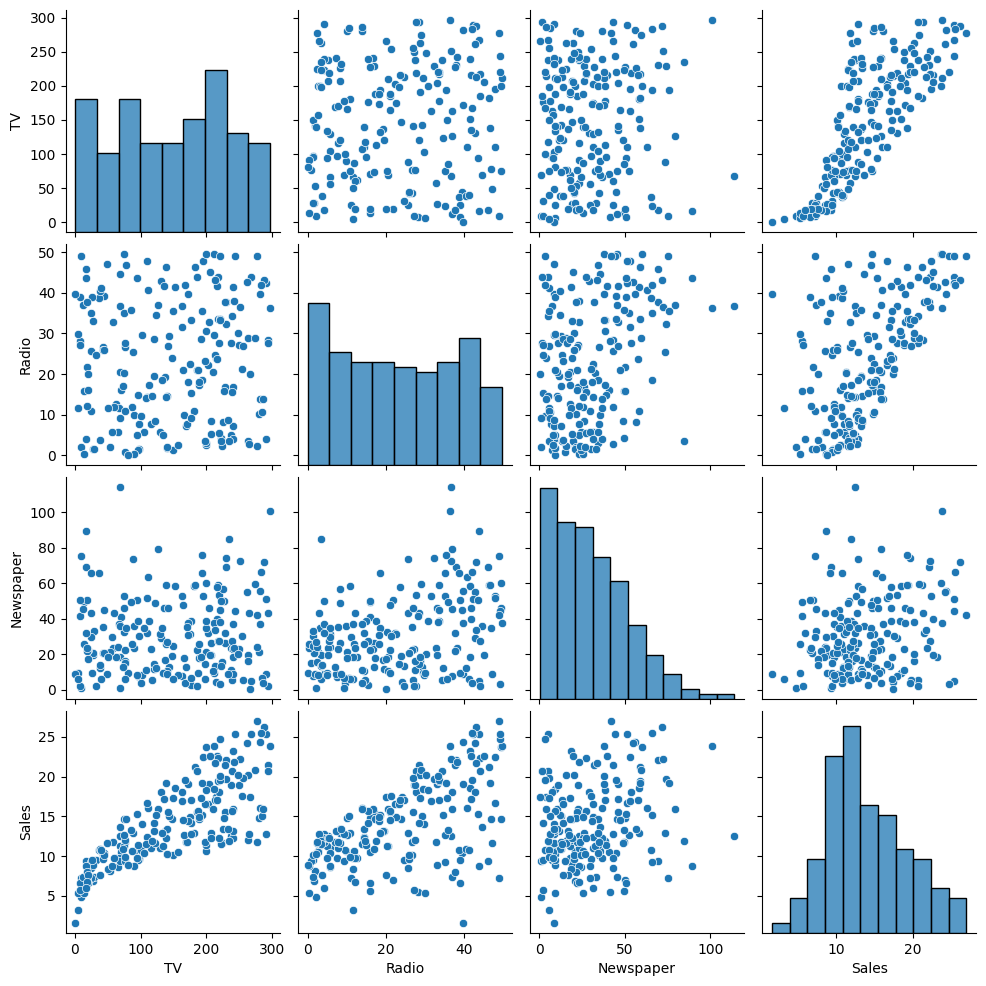

In [ ]:
sns.pairplot(data)

In [ ]:
correlation = data.corr()

In [ ]:
correlation

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


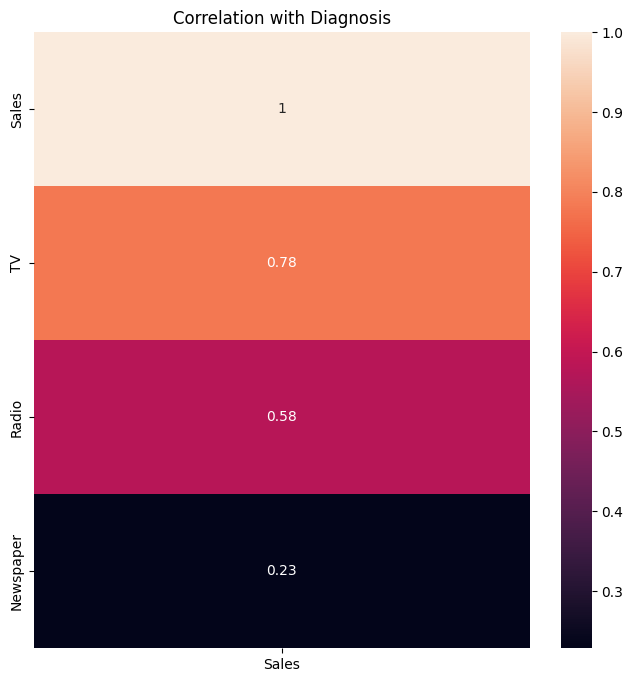

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation[['Sales']].sort_values(by='Sales', ascending=False), annot=True)
plt.title("Correlation with Diagnosis")
plt.show()

# Split data

In [ ]:
x =data.drop('Sales',axis = 1)
y = data['Sales']

# Scaling data

In [ ]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=45)

# Train and Test Model

R2 Score =  89.56%
Mean Absolute Error =  1.0788802763848646
Mean Squared Error =  2.2564942472809335
Root Mean Squared Error =  1.5021631892976652


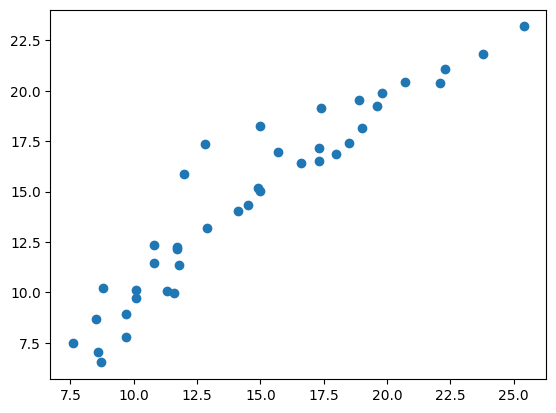

In [ ]:
LR = train_test_model(LinearRegression(),x_train,x_test,y_train,y_test)

In [ ]:
# the coefficients
LR.coef_
# The coefficients in a dataframe
cdata = pd.DataFrame(LR.coef_,x.columns,columns=['Coef'])
cdata.reset_index()

,index,Coef
0,TV,13.896014
1,Radio,9.099685
2,Newspaper,-0.553100


R2 Score =  94.31%
Mean Absolute Error =  0.9050000000000002
Mean Squared Error =  1.2300000000000004
Root Mean Squared Error =  1.1090536506409419


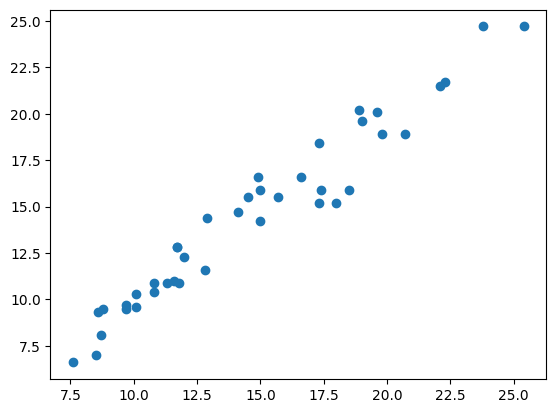

In [ ]:
DR = train_test_model(DecisionTreeRegressor(),x_train,x_test,y_train,y_test)

In [ ]:
importances = DR.feature_importances_
feature_names = x.columns
importance_data= pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_data = importance_data.sort_values(by='Importance', ascending=False)
importance_data

,Feature,Importance
0,TV,0.642097
1,Radio,0.353721
2,Newspaper,0.004182


R2 Score =  97.72%
Mean Absolute Error =  0.5456999999999972
Mean Squared Error =  0.49207194999999704
Root Mean Squared Error =  0.7014784030887886


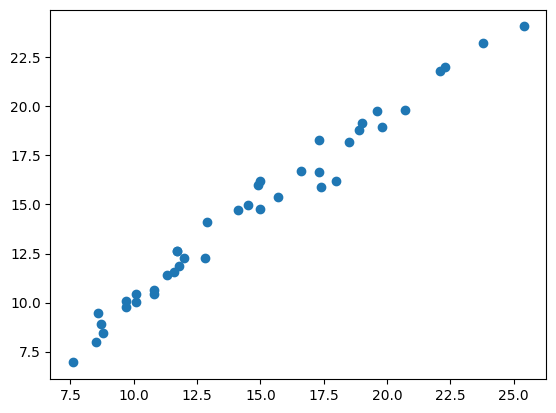

In [ ]:
RF = train_test_model(RandomForestRegressor(),x_train,x_test,y_train,y_test)

In [ ]:
importances = RF.feature_importances_
feature_names = x.columns
importance_data= pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_data = importance_data.sort_values(by='Importance', ascending=False)
importance_data

,Feature,Importance
0,TV,0.646702
1,Radio,0.343047
2,Newspaper,0.010251


R2 Score =  97.65%
Mean Absolute Error =  0.5480284333229064
Mean Squared Error =  0.5068155642077319
Root Mean Squared Error =  0.7119098006122208


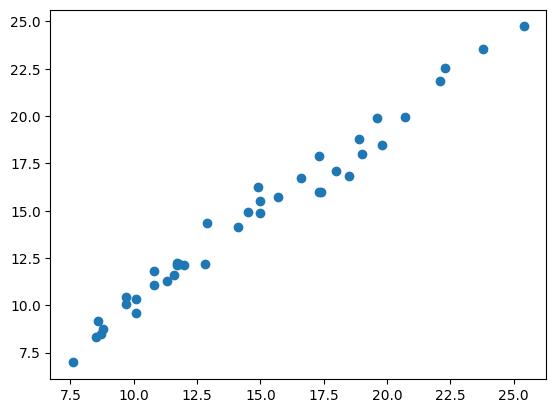

In [ ]:
XG = train_test_model(XGBRegressor(),x_train,x_test,y_train,y_test)

In [ ]:
importances = XG.feature_importances_
feature_names = x.columns
importance_data= pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_data = importance_data.sort_values(by='Importance', ascending=False)
importance_data

,Feature,Importance
0,TV,0.558034
1,Radio,0.436575
2,Newspaper,0.005391
